In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import datetime
from scipy.stats import linregress

# Import API Key
from config import api_key

In [2]:
# Attempt to get Monthly data from API for USD vs. JPY
try:
    usd_yen = requests.get(f"https://www.alphavantage.co/query?function=FX_MONTHLY&from_symbol=USD&to_symbol=JPY&apikey={api_key}").json()
except:
    print("Something went wrong with the API request.")

In [3]:
# Convert to DataFrame
usdjpy_df = pd.DataFrame(usd_yen['Time Series FX (Monthly)'])
usdjpy_df = usdjpy_df.transpose()
usdjpy_df

,1. open,2. high,3. low,4. close
2024-11-19,152.28700,156.74600,151.34300,154.09400
2024-10-31,143.73599,153.86800,143.53200,151.98000
2024-09-30,146.38100,147.18800,139.57800,143.71001
2024-08-29,149.20100,149.76401,141.69701,144.89000
2024-07-31,161.51199,161.94200,148.50501,149.74400
...,...,...,...,...
2015-04-30,119.57600,120.83300,118.50700,119.45200
2015-03-31,119.84500,121.99600,118.33000,120.02200
2015-02-26,117.18500,120.40200,116.89600,119.37700
2015-01-29,119.89000,120.73600,115.86500,118.24800


In [4]:
# Clean Dataframe
renamed_df = usdjpy_df.rename(columns={"1. open":"Open", "2. high":"High", "3. low":"Low", "4. close":"Close"})
clean_df = renamed_df[["Open", "Close", "High", "Low"]].astype(float)
clean_df["Daily Average"] = clean_df.mean(axis=1)
clean_df.index = pd.to_datetime(clean_df.index)
clean_df.head()


,Open,Close,High,Low,Daily Average
2024-11-19,152.28700,154.09400,156.74600,151.34300,153.617500
2024-10-31,143.73599,151.98000,153.86800,143.53200,148.278998
2024-09-30,146.38100,143.71001,147.18800,139.57800,144.214252
2024-08-29,149.20100,144.89000,149.76401,141.69701,146.388005
2024-07-31,161.51199,149.74400,161.94200,148.50501,155.425750


In [5]:
# Summarize Open, Close, High, and Low of USD to JPY
start_time = list(usd_yen["Time Series FX (Monthly)"])[0]
end_time = list(usd_yen["Time Series FX (Monthly)"])[-1]
usdjpy_mean = clean_df["Open"].mean()
usdjpy_median = clean_df["Open"].median()
usdjpy_std = clean_df["Open"].std()
usdjpy_var = clean_df["Open"].var()
print(f"USD to JPY from {start_time} to {end_time} \nUSD to JPY Mean= {round(usdjpy_mean, 2)} \nUSD to JPY Median= {round(usdjpy_median, 2)} \nUSD to JPY STD Error= {round(usdjpy_std, 2)} \nUSD to JPY Variance= {round(usdjpy_var, 2)}")


USD to JPY from 2024-11-19 to 2014-12-31 
USD to JPY Mean= 119.71 
USD to JPY Median= 112.85 
USD to JPY STD Error= 15.26 
USD to JPY Variance= 232.92


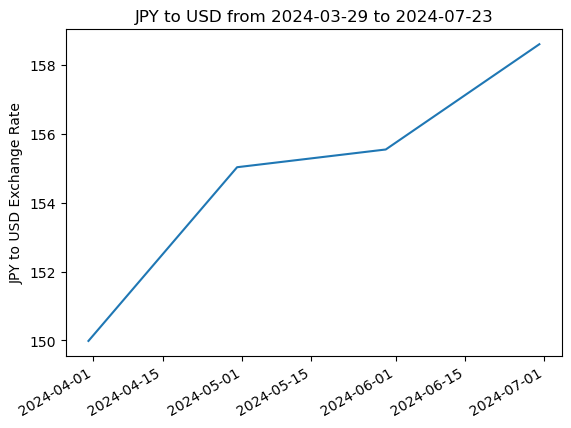

In [6]:
# Make df for Necropolis League
nec_start = pd.to_datetime("2024-03-29")
nec_end = pd.to_datetime("2024-07-23")
nec_time = clean_df[(clean_df.index <= nec_end) & (clean_df.index >= nec_start)]
nec_time_daily = nec_time["Daily Average"]

# Linear Regression for Necropolis League USD->JPY
nec_start_date = nec_start.date()
nec_end_date = nec_end.date()
nec_time_daily.plot(use_index=True, ylabel="JPY to USD Exchange Rate" , title= f"JPY to USD from {nec_start_date} to {nec_end_date}")
plt.savefig("JPYtoUSDNecLine.jpg")

<Axes: title={'center': 'JPY to USD from 2023-04-07 to 2023-08-15'}, ylabel='JPY to USD Exchange Rate'>

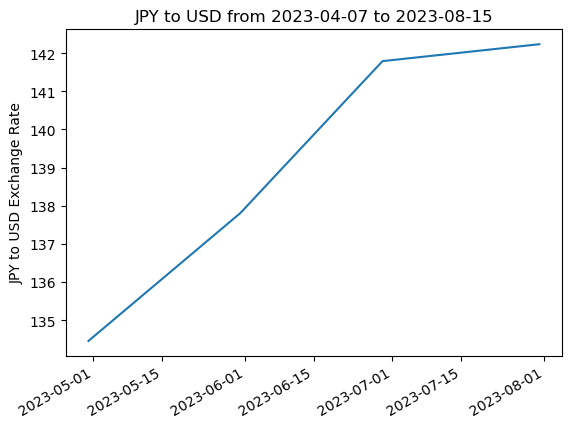

In [7]:
# Make df for Crucible League
cru_start = pd.to_datetime("2023-04-07")
cru_end = pd.to_datetime("2023-08-15")
cru_time = clean_df[(clean_df.index <= cru_end) & (clean_df.index >= cru_start)]
cru_time_daily = cru_time["Daily Average"]

# Plot Crucible League USD->JPY
cru_end_date = cru_end.date()
cru_start_date = cru_start.date()
cru_time_daily.plot(use_index=True, title= f"JPY to USD from {cru_start_date} to {cru_end_date}", ylabel= "JPY to USD Exchange Rate")



In [8]:
# Necropolis timeframe statistics
nec_mean = nec_time_daily.mean()
nec_median = nec_time_daily.median()
nec_std = nec_time_daily.std()
nec_var = nec_time_daily.var()
print(f"JPY to USD from {nec_start_date} to {nec_end_date} (Necropolis) \nJPY to USD Mean= {round(nec_mean, 2)} \nJPY to USD Median= {round(nec_median, 2)} \nJPY to USD STD Error= {round(nec_std, 2)} \nJPY to USD Variance= {round(nec_var, 2)}")

JPY to USD from 2024-03-29 to 2024-07-23 (Necropolis) 
JPY to USD Mean= 154.79 
JPY to USD Median= 155.29 
JPY to USD STD Error= 3.57 
JPY to USD Variance= 12.74


In [9]:
# Crucible timeframe statistics
cru_mean = cru_time_daily.mean()
cru_median = cru_time_daily.median()
cru_std = cru_time_daily.std()
cru_var = cru_time_daily.var()
print(f"JPY to USD from {cru_start_date} to {cru_end_date} (Crucible) \nJPY to USD Mean= {round(cru_mean, 2)} \nJPY to USD Median= {round(cru_median, 2)} \nJPY to USD STD Error= {round(cru_std, 2)} \nJPY to USD Variance= {round(cru_var, 2)}")

JPY to USD from 2023-04-07 to 2023-08-15 (Crucible) 
JPY to USD Mean= 139.07 
JPY to USD Median= 139.8 
JPY to USD STD Error= 3.67 
JPY to USD Variance= 13.44


In [10]:
# Create Dataframe for necropolis time frame and reset index to for formatting
nec_time = clean_df[(clean_df.index <= nec_end) & (clean_df.index >= nec_start)]
nec_time = nec_time.reset_index(names="Date")



In [11]:
# Add column of Ordinal formated from datetime to dataframe
nec_time["Ordinal"] = nec_time["Date"].apply(pd.Timestamp.toordinal)
nec_time

,Date,Open,Close,High,Low,Daily Average,Ordinal
0,2024-06-30,157.17999,160.907,161.71500,154.60100,158.600748,739067
1,2024-05-30,155.70399,156.953,157.63901,151.88100,155.544250,739036
2,2024-04-30,151.58099,157.722,159.96100,150.85400,155.029498,739006
3,2024-03-31,150.10500,151.398,151.94400,146.49499,149.985498,738976


0.09 * x + -64111.57


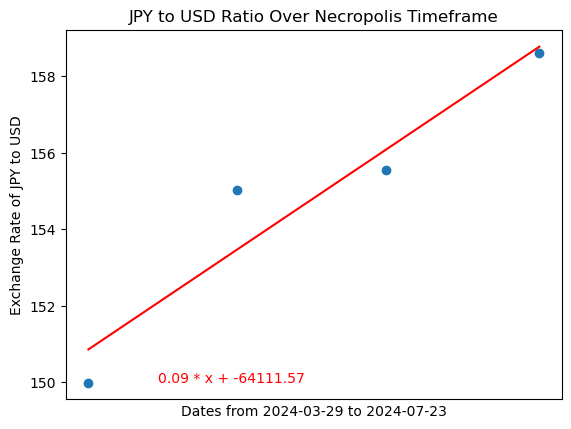

In [ ]:
# Plot best fit line to scatter graph of data using polyfit and output equation
nec_m, nec_b = np.polyfit(nec_time["Ordinal"], nec_time["Daily Average"], 1)
nec_time_line_eq = f"{round(nec_m, 2)} * x + {round(nec_b, 2)}"
print(nec_time_line_eq)
plt.scatter(nec_time["Ordinal"], nec_time["Daily Average"])
plt.plot(nec_time["Ordinal"], nec_m * nec_time["Ordinal"] + nec_b, color="red")
plt.annotate(nec_time_line_eq, xy=[738990, 150], color="red")
plt.xlabel(f"Dates from {nec_start_date} to {nec_end_date}")
plt.xticks([])
plt.ylabel("Exchange Rate of JPY to USD")
plt.title("JPY to USD Ratio Over Necropolis Timeframe")
plt.savefig("JPYtoUSDNecropolis.jpg")
plt.show()

In [13]:
# Linear regression aquired from scipy
slope, intercept, r, p, se = linregress(nec_time["Ordinal"], nec_time["Daily Average"])
print(f"y = {slope}x + {intercept}")

y = 0.08696145224091921x + -64111.571138774416


In [14]:
# Create Dataframe for crucible time frame and reset index to for formatting
cru_time = clean_df[(clean_df.index <= cru_end) & (clean_df.index >= cru_start)]
cru_time = cru_time.reset_index(names="Date")

In [15]:
# Add column of Ordinal formated from datetime to dataframe
cru_time["Ordinal"] = cru_time["Date"].apply(pd.Timestamp.toordinal)
cru_time

,Date,Open,Close,High,Low,Daily Average,Ordinal
0,2023-07-31,144.398,142.323,144.90900,137.31500,142.236250,738732
1,2023-06-29,138.748,144.780,145.03301,138.61000,141.792753,738700
2,2023-05-31,137.521,139.127,140.90300,133.68600,137.809250,738671
3,2023-04-30,133.347,136.386,137.40199,130.68401,134.454750,738640


y = 0.09 * x + -65744.83


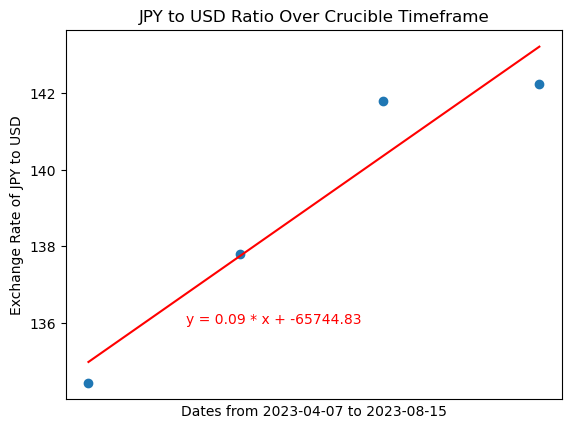

In [ ]:
# Plot best fit line to scatter graph of data using polyfit and display equation
cru_m, cru_b = np.polyfit(cru_time["Ordinal"], cru_time["Daily Average"], 1)
cru_time_lin_eq = f"y = {round(cru_m, 2)} * x + {round(cru_b, 2)}"
print(cru_time_lin_eq)
plt.scatter(cru_time["Ordinal"], cru_time["Daily Average"])
plt.xticks([])
plt.plot(cru_time["Ordinal"], cru_m * cru_time["Ordinal"] + cru_b, color="red")
plt.title("JPY to USD Ratio Over Crucible Timeframe")
plt.xlabel(f"Dates from {cru_start_date} to {cru_end_date}")
plt.ylabel("Exchange Rate of JPY to USD")
plt.annotate(cru_time_lin_eq, xy=[738660, 136], color="red")
plt.savefig("JPYtoUSDCrucible.jpg")
plt.show()

In [17]:
# Linear regression aquired from scipy
slope, intercept, r, p, se = linregress(cru_time["Ordinal"], cru_time["Daily Average"])
print(f"y = {slope}x + {intercept}")

y = 0.08919070133254517x + -65744.82685623212


In [21]:
# Break down Path of Exile currency CSV to Chaos/Divine and add Ordinal datetime for plotting
necro_df = pd.read_csv("../Path-of-Exile-Analysis/resources/Necropolis.currency.csv", delimiter = ";")
chaos_orb_pay = necro_df[(necro_df["Pay"] == "Chaos Orb")]
clean_necro = chaos_orb_pay.drop(columns=["League", "Confidence"])
grouped_necro = clean_necro.sort_values(["Get", "Date"])
divine_orb = grouped_necro[grouped_necro["Get"].isin(["Divine Orb"])]
divine_orb["DateTime"] = pd.to_datetime(divine_orb["Date"])
divine_orb["Ordinal"] = divine_orb["DateTime"].apply(pd.Timestamp.toordinal)
div_var = divine_orb["Value"].var()
print(f"Variance of Chaos/Divine orb exchange rate: {round(div_var, 2)}")
divine_orb

Variance of Chaos/Divine orb exchange rate: 351.4


C:\Users\sirla\AppData\Local\Temp\ipykernel_9448\992037070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divine_orb["DateTime"] = pd.to_datetime(divine_orb["Date"])
C:\Users\sirla\AppData\Local\Temp\ipykernel_9448\992037070.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divine_orb["Ordinal"] = divine_orb["DateTime"].apply(pd.Timestamp.toordinal)


,Date,Get,Pay,Value,DateTime,Ordinal
4089,2024-03-29,Divine Orb,Chaos Orb,38.0,2024-03-29,738974
4090,2024-03-30,Divine Orb,Chaos Orb,88.0,2024-03-30,738975
4091,2024-03-31,Divine Orb,Chaos Orb,108.0,2024-03-31,738976
4092,2024-04-01,Divine Orb,Chaos Orb,137.0,2024-04-01,738977
4093,2024-04-02,Divine Orb,Chaos Orb,143.0,2024-04-02,738978
...,...,...,...,...,...,...
4201,2024-07-19,Divine Orb,Chaos Orb,120.0,2024-07-19,739086
4202,2024-07-20,Divine Orb,Chaos Orb,120.0,2024-07-20,739087
4203,2024-07-21,Divine Orb,Chaos Orb,120.0,2024-07-21,739088
4204,2024-07-22,Divine Orb,Chaos Orb,120.0,2024-07-22,739089


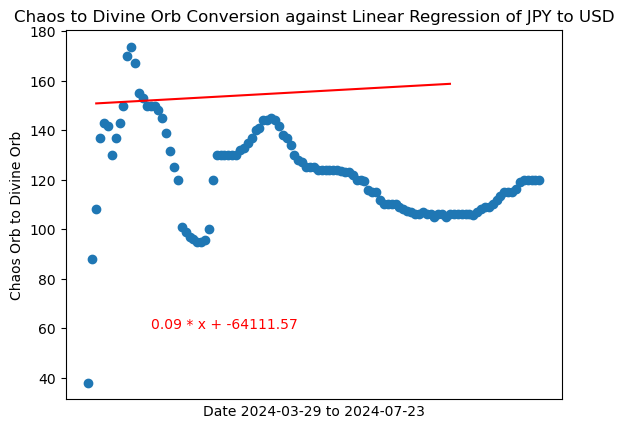

In [19]:
# Plot JPY to USD and Chaos to Divine data
plt.scatter(divine_orb["Ordinal"], divine_orb["Value"])
plt.plot(nec_time["Ordinal"], nec_m * nec_time["Ordinal"] + nec_b, color="red")
plt.xlabel("Date 2024-03-29 to 2024-07-23")
plt.xticks([])
plt.ylabel("Chaos Orb to Divine Orb")
plt.annotate(nec_time_line_eq, xy=[738990, 60], color="red")
plt.title("Chaos to Divine Orb Conversion against Linear Regression of JPY to USD")
plt.savefig("ChaostoDivineComparison.jpg")
plt.show()